In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [334]:
data = pd.read_csv('data_2.csv')
data 

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,...,HasFireplace,KitchensQuality,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,WindowModelNames,Price
0,1.0,1.0,35.0,NaN,69.0,NaN,NaN,Electricity,True,False,...,False,Good,Good,Excellent,Good,3.0,3.02,NaN,0M7BH4 Steel I4K3DH Window,208.13382
1,2.0,1.0,90.0,Urban,NaN,Excellent,False,Oil,True,False,...,False,Poor,Excellent,Good,Good,47.0,3.41,147.2,Steel UBXDQ9 Window,333.75130
2,NaN,1.0,45.0,NaN,61.0,NaN,NaN,Oil Heating,True,True,...,False,Good,Poor,Good,Good,3.0,1.62,67.2,Aluminum FTTGL,52.30557
3,NaN,2.0,62.0,Rural,31.0,NaN,False,Oil Heating,False,True,...,False,Good,Excellent,Good,Excellent,3.0,3.12,100.8,ZXTO6ID Wood GZDVAH6 Window,256.17149
4,2.0,1.0,95.0,Rural,48.0,NaN,NaN,Gas,False,True,...,False,Poor,Good,Poor,Poor,3.0,1.20,95.0,Wood DJ7 Window,252.23226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.0,2.0,76.0,Urban,NaN,Poor,False,Oil Heating,False,False,...,False,Excellent,Excellent,Good,Good,11.0,1.78,121.6,Steel ONGQXSV,235.10908
996,NaN,1.0,29.0,Urban,54.0,NaN,NaN,Electric,False,True,...,False,Excellent,Good,Good,Good,3.0,1.91,NaN,FGPJHA Wood 8YSK Window,103.91421
997,1.0,1.0,87.0,Urban,32.0,Excellent,True,Oil Heating,True,False,...,False,Poor,Poor,Excellent,Poor,47.0,2.86,NaN,Aluminum DEH,230.80934
998,1.0,1.0,38.0,Rural,65.0,Poor,False,Oil Heating,True,False,...,False,Good,Good,Good,Good,11.0,2.89,NaN,4CV Aluminum 768XK9,129.25993


In [335]:
#delete columns which are considered not important
#delete rows which are empty

data_cleaned = data.drop(columns=['HasPhotovoltaics', 'HasFiberglass', 'IsFurnished', 'DateSinceForSale', 'HouseColor', 'PreviousOwnerName', 'HasFireplace', 'BedroomsQuality', 'LivingRoomsQuality', 'PreviousOwnerRating', 'HeatingCosts', 'WindowModelNames'])
data_cleaned = data_cleaned.dropna(how='all')
data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1.0,1.0,35.0,NaN,69.0,NaN,Electricity,Good,Good,3.0,208.13382
1,2.0,1.0,90.0,Urban,NaN,Excellent,Oil,Poor,Excellent,47.0,333.75130
2,NaN,1.0,45.0,NaN,61.0,NaN,Oil Heating,Good,Poor,3.0,52.30557
3,NaN,2.0,62.0,Rural,31.0,NaN,Oil Heating,Good,Excellent,3.0,256.17149
4,2.0,1.0,95.0,Rural,48.0,NaN,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2.0,2.0,76.0,Urban,NaN,Poor,Oil Heating,Excellent,Excellent,11.0,235.10908
996,NaN,1.0,29.0,Urban,54.0,NaN,Electric,Excellent,Good,3.0,103.91421
997,1.0,1.0,87.0,Urban,32.0,Excellent,Oil Heating,Poor,Poor,47.0,230.80934
998,1.0,1.0,38.0,Rural,65.0,Poor,Oil Heating,Good,Good,11.0,129.25993


In [336]:
#missing values changes to 0 for bedrooms and bathrooms as well as changing datatype to integer

data_cleaned[['Bedrooms', 'Bathrooms']] = data_cleaned[['Bedrooms', 'Bathrooms']].fillna(0)
data_cleaned['Bedrooms'] = data_cleaned['Bedrooms'].astype(int)
data_cleaned['Bathrooms'] = data_cleaned['Bathrooms'].astype(int)
data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NaN,69.0,NaN,Electricity,Good,Good,3.0,208.13382
1,2,1,90.0,Urban,NaN,Excellent,Oil,Poor,Excellent,47.0,333.75130
2,0,1,45.0,NaN,61.0,NaN,Oil Heating,Good,Poor,3.0,52.30557
3,0,2,62.0,Rural,31.0,NaN,Oil Heating,Good,Excellent,3.0,256.17149
4,2,1,95.0,Rural,48.0,NaN,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,NaN,Poor,Oil Heating,Excellent,Excellent,11.0,235.10908
996,0,1,29.0,Urban,54.0,NaN,Electric,Excellent,Good,3.0,103.91421
997,1,1,87.0,Urban,32.0,Excellent,Oil Heating,Poor,Poor,47.0,230.80934
998,1,1,38.0,Rural,65.0,Poor,Oil Heating,Good,Good,11.0,129.25993


In [337]:
#detect Location errors (nan values should become "NoData", "Suburbann" should become "Suburban")

data_cleaned['Location'] = data_cleaned['Location'].fillna('NoData')
data_cleaned['Location'] = data_cleaned['Location'].replace('Suburbann', 'Suburban')
data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.0,NaN,Electricity,Good,Good,3.0,208.13382
1,2,1,90.0,Urban,NaN,Excellent,Oil,Poor,Excellent,47.0,333.75130
2,0,1,45.0,NoData,61.0,NaN,Oil Heating,Good,Poor,3.0,52.30557
3,0,2,62.0,Rural,31.0,NaN,Oil Heating,Good,Excellent,3.0,256.17149
4,2,1,95.0,Rural,48.0,NaN,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,NaN,Poor,Oil Heating,Excellent,Excellent,11.0,235.10908
996,0,1,29.0,Urban,54.0,NaN,Electric,Excellent,Good,3.0,103.91421
997,1,1,87.0,Urban,32.0,Excellent,Oil Heating,Poor,Poor,47.0,230.80934
998,1,1,38.0,Rural,65.0,Poor,Oil Heating,Good,Good,11.0,129.25993


In [338]:
#calculate NoData mean (SquareFootageHouse), Urban mean (SquareFootageHouse), 
# Suburban mean (SquareFootageHouse), Rural mean (SquareFootageHouse)

location_mean = data_cleaned.groupby('Location')['SquareFootageHouse'].mean()
means_per_location = location_mean.loc[['NoData', 'Urban', 'Suburban', 'Rural']]

means_per_location

Location
NoData      126.282609
Urban       185.505618
Suburban    117.662162
Rural       132.028986
Name: SquareFootageHouse, dtype: float64

In [339]:
# Filter for values between 1 and 150 (assuming 0 is not valid as per your criteria)
data_cleaned['SquareFootageHouse'] = data_cleaned.apply(lambda row: means_per_location[row['Location']] 
                                                        if (row['SquareFootageHouse'] <= 0 or 
                                                            row['SquareFootageHouse'] > 150) else 
                                                            row['SquareFootageHouse'], axis=1)
data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.0,NaN,Electricity,Good,Good,3.0,208.13382
1,2,1,90.0,Urban,NaN,Excellent,Oil,Poor,Excellent,47.0,333.75130
2,0,1,45.0,NoData,61.0,NaN,Oil Heating,Good,Poor,3.0,52.30557
3,0,2,62.0,Rural,31.0,NaN,Oil Heating,Good,Excellent,3.0,256.17149
4,2,1,95.0,Rural,48.0,NaN,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,NaN,Poor,Oil Heating,Excellent,Excellent,11.0,235.10908
996,0,1,29.0,Urban,54.0,NaN,Electric,Excellent,Good,3.0,103.91421
997,1,1,87.0,Urban,32.0,Excellent,Oil Heating,Poor,Poor,47.0,230.80934
998,1,1,38.0,Rural,65.0,Poor,Oil Heating,Good,Good,11.0,129.25993


In [340]:
#sum heating types to general heating types 
#(for example "Oil" and "Oil Heating" should be then called "Oil", 
#aslo "Electricity" and "Electric" should be then called "Electricity")
data_cleaned['HeatingType'] = data_cleaned['HeatingType'].replace('Oil Heating', 'Oil')
data_cleaned['HeatingType'] = data_cleaned['HeatingType'].replace('Electric', 'Electricity')
data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.0,NaN,Electricity,Good,Good,3.0,208.13382
1,2,1,90.0,Urban,NaN,Excellent,Oil,Poor,Excellent,47.0,333.75130
2,0,1,45.0,NoData,61.0,NaN,Oil,Good,Poor,3.0,52.30557
3,0,2,62.0,Rural,31.0,NaN,Oil,Good,Excellent,3.0,256.17149
4,2,1,95.0,Rural,48.0,NaN,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,NaN,Poor,Oil,Excellent,Excellent,11.0,235.10908
996,0,1,29.0,Urban,54.0,NaN,Electricity,Excellent,Good,3.0,103.91421
997,1,1,87.0,Urban,32.0,Excellent,Oil,Poor,Poor,47.0,230.80934
998,1,1,38.0,Rural,65.0,Poor,Oil,Good,Good,11.0,129.25993


In [341]:
#calculate Oil mean (Age), Gas mean (Age), Electricity mean (Age)
#detect Age outliers (negative and nan values) (should be 0 - 150) based on Oil, Gas and Electricity Age means
age_mean_per_heating = data_cleaned.groupby('HeatingType')['Age'].mean()

oil_mean_age = age_mean_per_heating.get('Oil', data_cleaned['Age'].mean())
gas_mean_age = age_mean_per_heating.get('Gas', data_cleaned['Age'].mean())
electricity_mean_age = age_mean_per_heating.get('Electricity', data_cleaned['Age'].mean())

def replace_age_outliers(row):
    if pd.isna(row['Age']) or row['Age'] < 0 or row['Age'] > 150:
        if row['HeatingType'] == 'Oil':
            return oil_mean_age
        elif row['HeatingType'] == 'Gas':
            return gas_mean_age
        elif row['HeatingType'] == 'Electricity':
            return electricity_mean_age
        else:
            return data_cleaned['Age'].mean()
    else:
        return row['Age']

data_cleaned['Age'] = data_cleaned.apply(replace_age_outliers, axis=1)

data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.000000,NaN,Electricity,Good,Good,3.0,208.13382
1,2,1,90.0,Urban,41.798319,Excellent,Oil,Poor,Excellent,47.0,333.75130
2,0,1,45.0,NoData,61.000000,NaN,Oil,Good,Poor,3.0,52.30557
3,0,2,62.0,Rural,31.000000,NaN,Oil,Good,Excellent,3.0,256.17149
4,2,1,95.0,Rural,48.000000,NaN,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,41.798319,Poor,Oil,Excellent,Excellent,11.0,235.10908
996,0,1,29.0,Urban,54.000000,NaN,Electricity,Excellent,Good,3.0,103.91421
997,1,1,87.0,Urban,32.000000,Excellent,Oil,Poor,Poor,47.0,230.80934
998,1,1,38.0,Rural,65.000000,Poor,Oil,Good,Good,11.0,129.25993


In [342]:
#go through pool Quality and change na to 0 and other values (wchih means that there is a pool) to 1 
#so that the model can differentioate is the house has a pool (1) or not (0)

data_cleaned['PoolQuality'] = data_cleaned['PoolQuality'].fillna(0)
data_cleaned['PoolQuality'] = data_cleaned['PoolQuality'].apply(lambda x: 1 if x != 0 else 0)

data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.000000,0,Electricity,Good,Good,3.0,208.13382
1,2,1,90.0,Urban,41.798319,1,Oil,Poor,Excellent,47.0,333.75130
2,0,1,45.0,NoData,61.000000,0,Oil,Good,Poor,3.0,52.30557
3,0,2,62.0,Rural,31.000000,0,Oil,Good,Excellent,3.0,256.17149
4,2,1,95.0,Rural,48.000000,0,Gas,Poor,Good,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,41.798319,1,Oil,Excellent,Excellent,11.0,235.10908
996,0,1,29.0,Urban,54.000000,0,Electricity,Excellent,Good,3.0,103.91421
997,1,1,87.0,Urban,32.000000,1,Oil,Poor,Poor,47.0,230.80934
998,1,1,38.0,Rural,65.000000,1,Oil,Good,Good,11.0,129.25993


In [343]:
#for KitchensQuality and BathroomsQuality go through data and exchange "Poor" with 1, "Good" with 2 and "Excellent" with 3
quality_mapping = {'Poor': 1, 'Good': 2, 'Excellent': 3}

data_cleaned['KitchensQuality'] = data_cleaned['KitchensQuality'].map(quality_mapping)
data_cleaned['BathroomsQuality'] = data_cleaned['BathroomsQuality'].map(quality_mapping)

data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.000000,0,Electricity,2,2,3.0,208.13382
1,2,1,90.0,Urban,41.798319,1,Oil,1,3,47.0,333.75130
2,0,1,45.0,NoData,61.000000,0,Oil,2,1,3.0,52.30557
3,0,2,62.0,Rural,31.000000,0,Oil,2,3,3.0,256.17149
4,2,1,95.0,Rural,48.000000,0,Gas,1,2,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,41.798319,1,Oil,3,3,11.0,235.10908
996,0,1,29.0,Urban,54.000000,0,Electricity,3,2,3.0,103.91421
997,1,1,87.0,Urban,32.000000,1,Oil,1,1,47.0,230.80934
998,1,1,38.0,Rural,65.000000,1,Oil,2,2,11.0,129.25993


In [344]:
#delete data rows with a price over 1000

data_cleaned = data_cleaned[data_cleaned['Price'] <= 1000]

data_cleaned

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HeatingType,KitchensQuality,BathroomsQuality,SquareFootageGarden,Price
0,1,1,35.0,NoData,69.000000,0,Electricity,2,2,3.0,208.13382
1,2,1,90.0,Urban,41.798319,1,Oil,1,3,47.0,333.75130
2,0,1,45.0,NoData,61.000000,0,Oil,2,1,3.0,52.30557
3,0,2,62.0,Rural,31.000000,0,Oil,2,3,3.0,256.17149
4,2,1,95.0,Rural,48.000000,0,Gas,1,2,3.0,252.23226
...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,76.0,Urban,41.798319,1,Oil,3,3,11.0,235.10908
996,0,1,29.0,Urban,54.000000,0,Electricity,3,2,3.0,103.91421
997,1,1,87.0,Urban,32.000000,1,Oil,1,1,47.0,230.80934
998,1,1,38.0,Rural,65.000000,1,Oil,2,2,11.0,129.25993


In [345]:
# data_cleaned.to_excel('test.xlsx', index=False, engine='openpyxl')

In [346]:
# Exploratory Data Analysis:
print(data_cleaned.describe())
print(data_cleaned.info())

         Bedrooms   Bathrooms  SquareFootageHouse         Age  PoolQuality  \
count  973.000000  973.000000          973.000000  973.000000   973.000000   
mean     1.192189    1.399794           86.737446   44.910659     0.386434   
std      1.194578    1.086524           38.106122   15.399945     0.487182   
min      0.000000    0.000000           19.000000    0.000000     0.000000   
25%      0.000000    1.000000           54.000000   36.000000     0.000000   
50%      1.000000    1.000000           88.000000   46.114286     0.000000   
75%      2.000000    2.000000          119.000000   56.000000     1.000000   
max      5.000000    5.000000          185.505618   71.000000     1.000000   

       KitchensQuality  BathroomsQuality  SquareFootageGarden       Price  
count       973.000000        973.000000           973.000000  973.000000  
mean          2.095581          2.139774            10.469681  205.950281  
std           0.699876          0.704914            13.081509  105.77

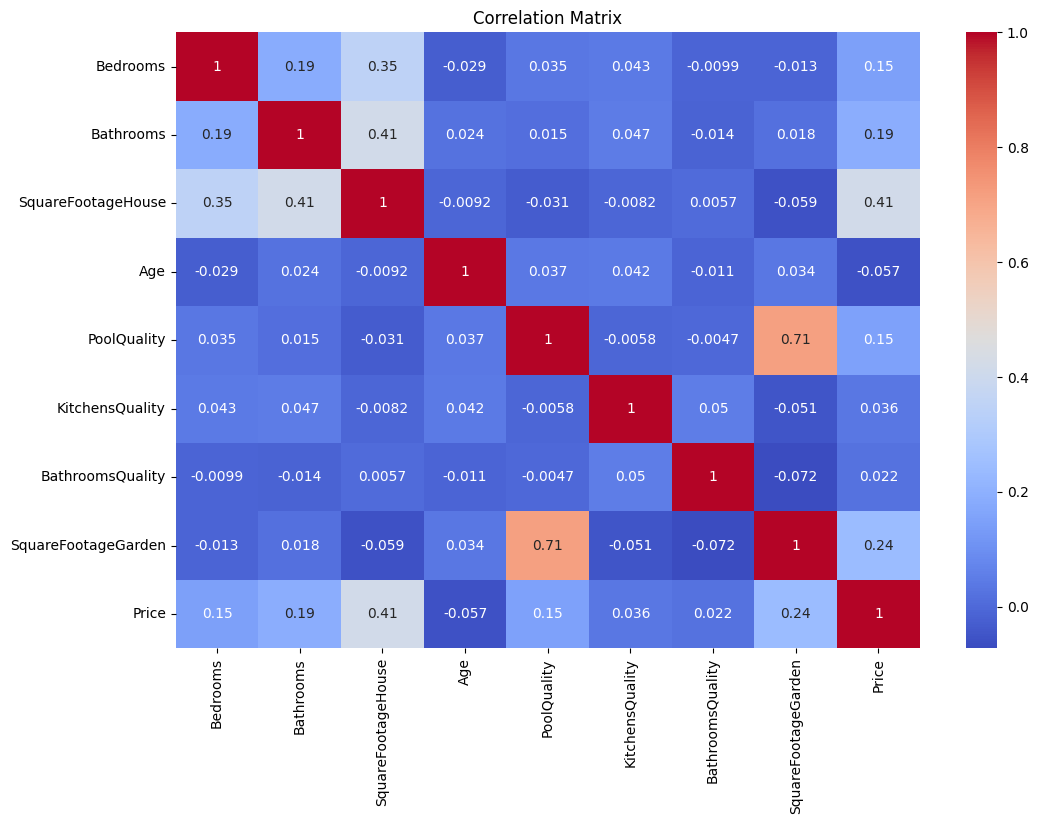

In [347]:
# Correlation Matrix : 
numeric_data = data_cleaned.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


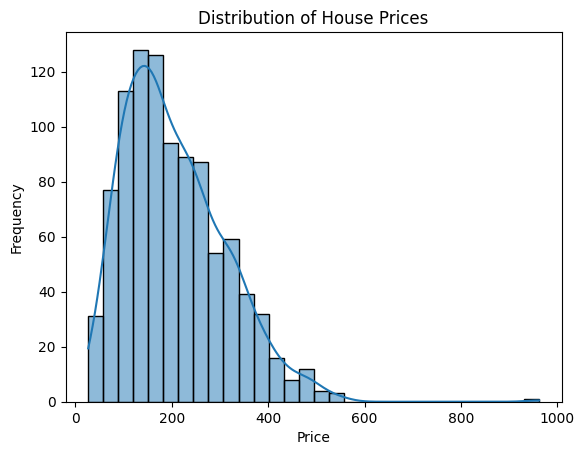

In [348]:
# Distribution of Prices: 
sns.histplot(data_cleaned['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


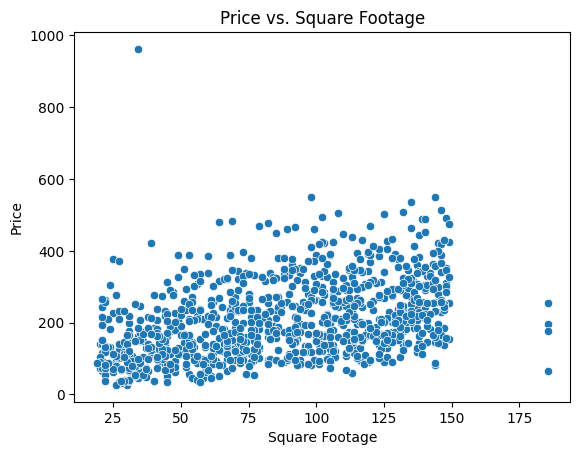

In [349]:
# Scatter Plot of Price vs. Square Footage:
sns.scatterplot(x='SquareFootageHouse', y='Price', data=data_cleaned)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


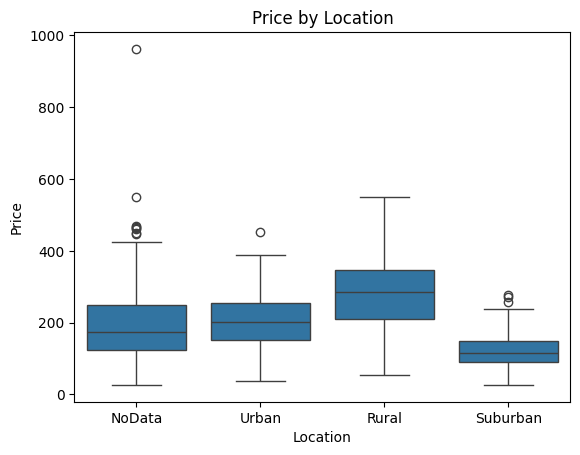

In [350]:
# Box Plot of Price by Location:
sns.boxplot(x='Location', y='Price', data=data_cleaned)
plt.title('Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()


Data Preprocessing for Modeling

In [351]:
# Encoding Categorical Variables:
data_encoded = pd.get_dummies(data_cleaned, columns=['Location', 'HeatingType'], drop_first=True)


In [352]:
# Splitting Data into Features and Target:
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']


In [353]:
# Train-Test Split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Building the Predictive Model


In [354]:

# Fill NaN values with a placeholder for categorical variables
data_cleaned.loc[:, 'Location'] = data_cleaned['Location'].fillna('NoData')
data_cleaned.loc[:, 'PoolQuality'] = data_cleaned['PoolQuality'].fillna('None')
data_cleaned.loc[:, 'HeatingType'] = data_cleaned['HeatingType'].fillna('Unknown')

# One-hot encode categorical variables
#categorical_columns = ['Location', 'PoolQuality', 'HeatingType', 'KitchensQuality', 'BathroomsQuality', 'BedroomsQuality', 'LivingRoomsQuality']
categorical_columns = ['Location', 'PoolQuality', 'HeatingType', 'KitchensQuality', 'BathroomsQuality']
existing_columns = [col for col in categorical_columns if col in data_cleaned.columns]
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Handle any remaining NaN values in numeric columns (if any)
data_encoded = data_encoded.fillna(0)

# Verify all data is numeric
print(data_encoded.dtypes)


# Filter out rows where three specific columns contain False
data_encoded = data_encoded[~((data_encoded['Location_Rural'] == False) & 
                  (data_encoded['Location_Suburban'] == False) & 
                  (data_encoded['Location_Urban'] == False))]


# Splitting data into features and target
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
print(f'Train MAE: {mean_absolute_error(y_train, y_pred_train)}')
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'Train R2: {r2_score(y_train, y_pred_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred_test)}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'Test R2: {r2_score(y_test, y_pred_test)}')

Bedrooms                 int32
Bathrooms                int32
SquareFootageHouse     float64
Age                    float64
SquareFootageGarden    float64
Price                  float64
Location_Rural            bool
Location_Suburban         bool
Location_Urban            bool
PoolQuality_1             bool
HeatingType_Gas           bool
HeatingType_Oil           bool
KitchensQuality_2         bool
KitchensQuality_3         bool
BathroomsQuality_2        bool
BathroomsQuality_3        bool
dtype: object
Train MAE: 40.835538148928414
Train RMSE: 52.7674623193518
Train R2: 0.7288888176496787
Test MAE: 49.935633476230066
Test RMSE: 60.1640981558465
Test R2: 0.6839660976893217


In [355]:
# Random Forest:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

print(f'Train MAE (RF): {mean_absolute_error(y_train, y_pred_train_rf)}')
print(f'Train RMSE (RF): {np.sqrt(mean_squared_error(y_train, y_pred_train_rf))}')
print(f'Train R2 (RF): {r2_score(y_train, y_pred_train_rf)}')
print(f'Test MAE (RF): {mean_absolute_error(y_test, y_pred_test_rf)}')
print(f'Test RMSE (RF): {np.sqrt(mean_squared_error(y_test, y_pred_test_rf))}')
print(f'Test R2 (RF): {r2_score(y_test, y_pred_test_rf)}')


Train MAE (RF): 16.044733142881086
Train RMSE (RF): 21.340437341384003
Train R2 (RF): 0.9556573499320526
Test MAE (RF): 47.54253971266666
Test RMSE (RF): 60.96368290164762
Test R2 (RF): 0.6755100560444282


In [356]:
# finding best Hyperparams for RandomForest model (may take up to a minute)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_v2 = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_v2, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters found: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [372]:
# Random Forest Version 2 with found Hyperparams

best_rf_model = RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                                      min_samples_leaf=1, min_samples_split=2, n_estimators=200,
                                      random_state=42)

best_rf_model.fit(X_train, y_train)

y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

print(f'Train MAE (RF): {mean_absolute_error(y_train, y_pred_train_rf)}')
print(f'Train RMSE (RF): {np.sqrt(mean_squared_error(y_train, y_pred_train_rf))}')
print(f'Train R2 (RF): {r2_score(y_train, y_pred_train_rf)}')
print(f'Test MAE (RF): {mean_absolute_error(y_test, y_pred_test_rf)}')
print(f'Test RMSE (RF): {np.sqrt(mean_squared_error(y_test, y_pred_test_rf))}')
print(f'Test R2 (RF): {r2_score(y_test, y_pred_test_rf)}')

Train MAE (RF): 12.373198392995945
Train RMSE (RF): 17.07386700050393
Train R2 (RF): 0.9716156599033072
Test MAE (RF): 47.48747818531457
Test RMSE (RF): 59.52045344520156
Test R2 (RF): 0.6906918853666377


4. Answering the Questions

In [332]:
# If I have a budget of €100,000, what kind of houses will I be able to buy?

affordable_houses = data_cleaned[data_cleaned['Price'] <= 100000]
print(affordable_houses.describe())


# How much money can I save if I decide not to get a house with a pool?
#Here was "HasPool", but we have a "PoolQuality"
avg_price_with_pool = data_cleaned[data_cleaned['PoolQuality'] == 1]['Price'].mean()
avg_price_without_pool = data_cleaned[data_cleaned['PoolQuality'] == 0]['Price'].mean()
savings = avg_price_with_pool - avg_price_without_pool
print(f'Average savings without a pool: €{savings}')



         Bedrooms   Bathrooms  SquareFootageHouse         Age  PoolQuality  \
count  973.000000  973.000000          973.000000  973.000000   973.000000   
mean     1.192189    1.399794           86.737446   44.910659     0.386434   
std      1.194578    1.086524           38.106122   15.399945     0.487182   
min      0.000000    0.000000           19.000000    0.000000     0.000000   
25%      0.000000    1.000000           54.000000   36.000000     0.000000   
50%      1.000000    1.000000           88.000000   46.114286     0.000000   
75%      2.000000    2.000000          119.000000   56.000000     1.000000   
max      5.000000    5.000000          185.505618   71.000000     1.000000   

       KitchensQuality  BathroomsQuality  SquareFootageGarden       Price  
count       973.000000        973.000000           973.000000  973.000000  
mean          2.095581          2.139774            10.469681  205.950281  
std           0.699876          0.704914            13.081509  105.77